## Projekt grupowy "Klasyfikacja rodzajów szkła"

Zespół 17:
Maria Mierzejewska, 
Karol Cieślik,
Jakub Matłacz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

## 1. Wczytanie danych oryginalnych

In [2]:
glass_org = pd.read_csv(r'data\glass.csv')
glass_org

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Oznaczenia klas:<br>
-- 1 building windows float processed<br>
-- 2 building windows non float processed<br> 
-- 3 vehicle windows float processed<br>
-- 4 vehicle windows non float processed (none in this database)<br>
-- 5 containers<br>
-- 6 tableware<br>
-- 7 headlamps

## 2. Sprawdzenie braków danych i rozmiarów ramki

In [3]:
glass_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
glass_org.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
print("Liczba obiektów: ", glass_org.shape[0])
print("Liczba atrybutów włącznie z decyzyjnym: ", glass_org.shape[1])
print("Liczba braków danych w poszczególnych atrybutach:\n", glass_org.isna().sum())

Liczba obiektów:  214
Liczba atrybutów włącznie z decyzyjnym:  10
Liczba braków danych w poszczególnych atrybutach:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


## 3. Wykresy pudełkowe i skrzypcowe

In [6]:
def pokaz_pudelka(glass):
    plt.figure(figsize=(10,50), dpi= 80)
    plt.subplot(10,1,1)
    sns.boxplot(data=glass.iloc[:,0:-1])
    atrybuty = "RI Na Mg Al Si K Ca Ba Fe".split()
    for i in range(2,11):
        plt.subplot(10,1,i)
        sns.boxplot(x="Type", y=atrybuty[i-2], data=glass)

In [7]:
def pokaz_skrzypce(glass):
    plt.figure(figsize=(10,50), dpi= 80)
    plt.subplot(10,1,1)
    sns.violinplot(data=glass.iloc[:,0:-1])
    atrybuty = "RI Na Mg Al Si K Ca Ba Fe".split()
    for i in range(2,11):
        plt.subplot(10,1,i)
        sns.violinplot(x="Type", y=atrybuty[i-2], data=glass)

Obejrzymy teraz wykresy pudełkowe i skrzypcowe oryginalnych danych:

Od razu widać, że wartości atrybutu Si (wykres bez podziału na klasy) są znacznie większe od pozostałych. Wartość atrybutu Mg dość dobrze oddziela klasy 1,2,3 od 5,6.  Wartość Mg w klasie 7 jest prawie zawsze zerowa. Wartość K w klasie 6 jest prawie zawsze zerowa. Wartość Ba świetnie wyznacza klasę 7 (inne klasy mają jej wartość prawie zawsze zerową). Fe jest praktycznie zerowe w klasach 5,6,7 więc świetnie oddziela je od klas 1,2,3.

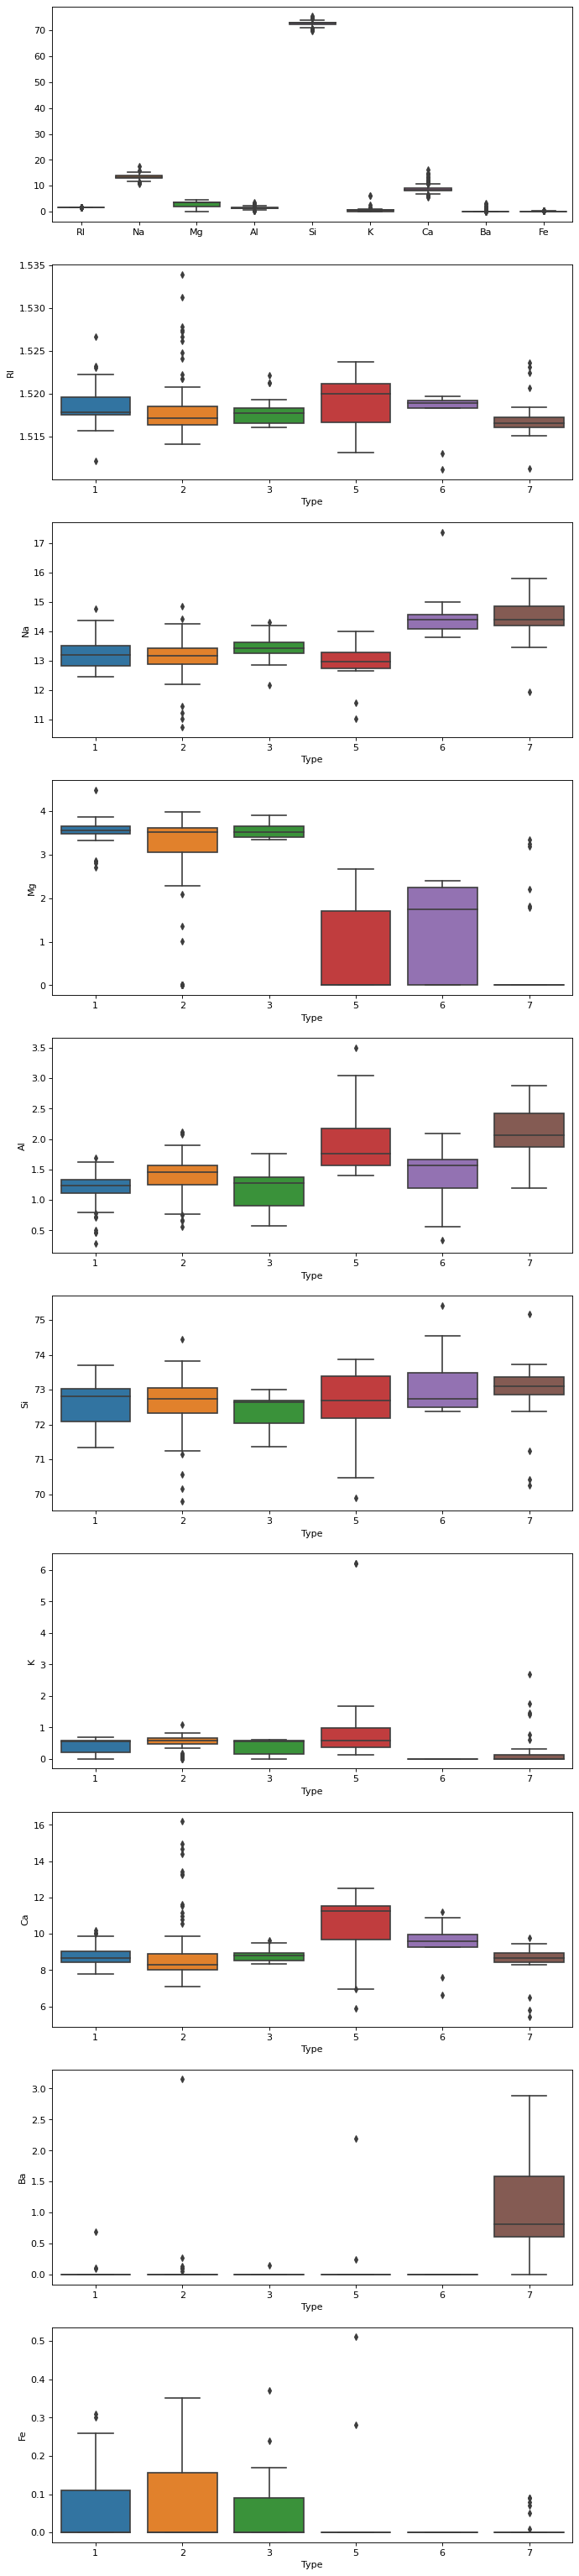

In [8]:
pokaz_pudelka(glass_org)

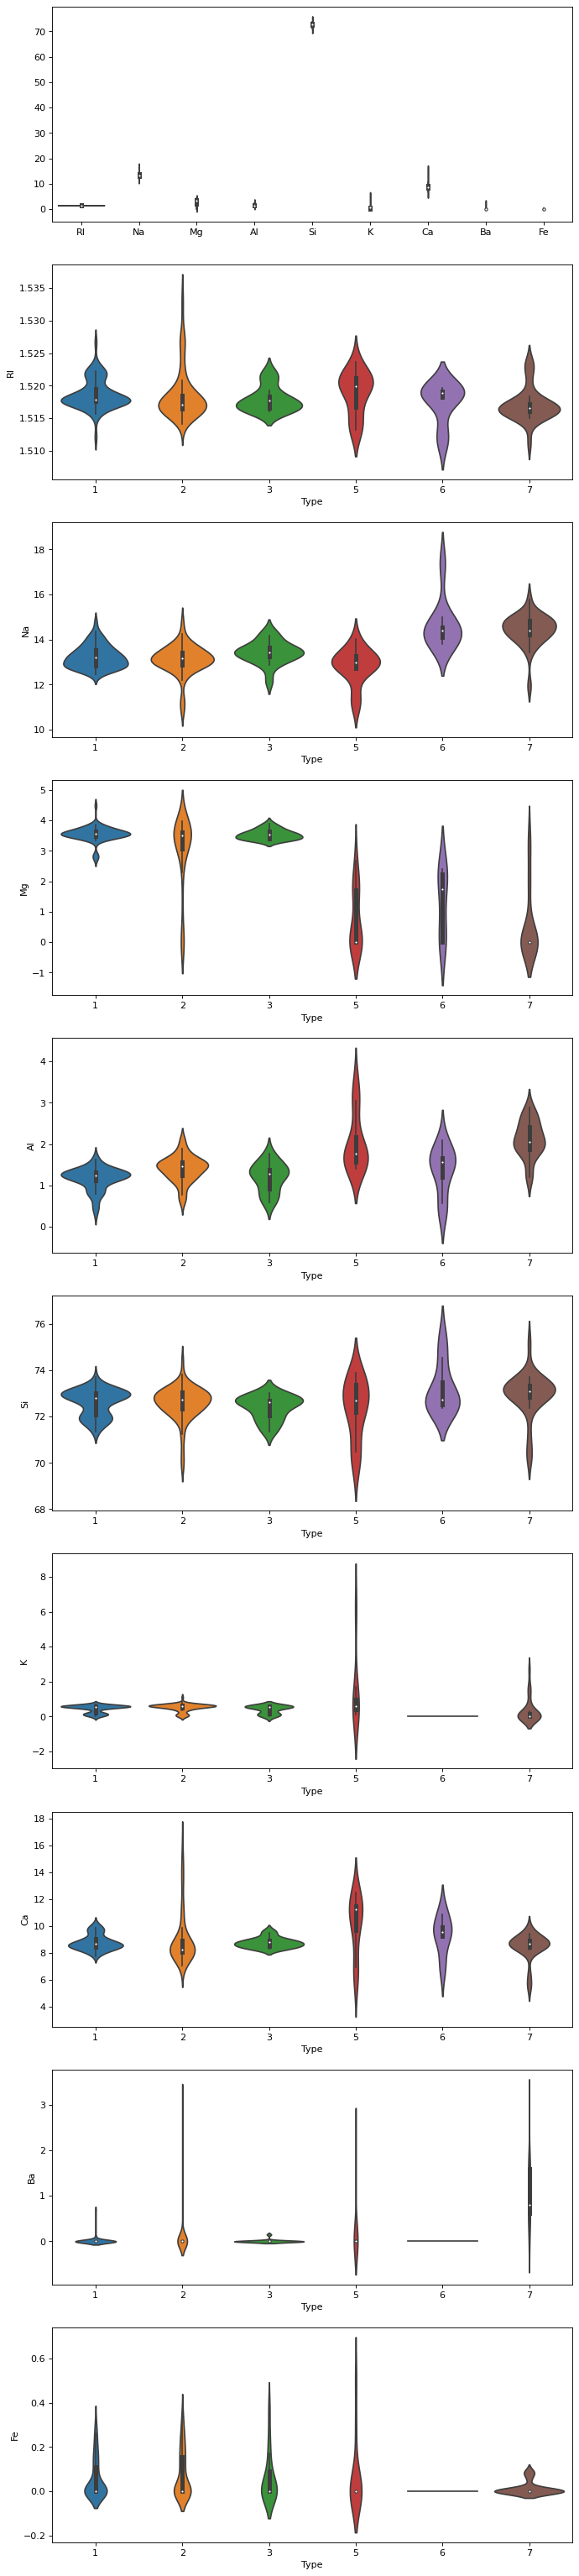

In [9]:
pokaz_skrzypce(glass_org)

## 4. Macierz korelacji oraz macierz wykresów punktowych

Macierz korelacji Pearsona w celu ewentualnej eliminacji zbędnych atrybutów. Widać, że cecha Ca jest mocno skorelowana z cechą RI jednak nie wystarczająco, aby pominąć jedną z nich. Drugi najwyższy współczynnik korelacji dla Al oraz Ba jednak wciąż mały.

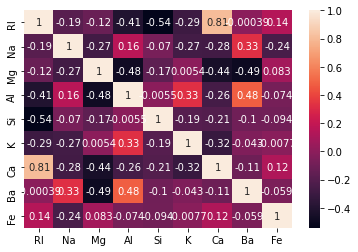

In [10]:
sns.heatmap(glass_org.iloc[:,0:-1].corr(), annot = glass_org.iloc[:,0:-1].corr())

Macierz wykresów punktowych w celu lepszej wizualizacji zbioru. Widać, że cecha Ba może być dobrym wyznacznikiem przynależności obiektu do klasy 7. Wiele z histogramów przenika się w ogromnym stopniu. Wiele atrybutów nie może samodzielnie dawać dużego pojęcia o przynależności obiektu do klasy gdyż histogramy mają duże części wspólne. Wnioski o cechach rozdzielających klasy łatwiej było wyciągnąć patrząc na wykresy pudełkowe powyżej. 

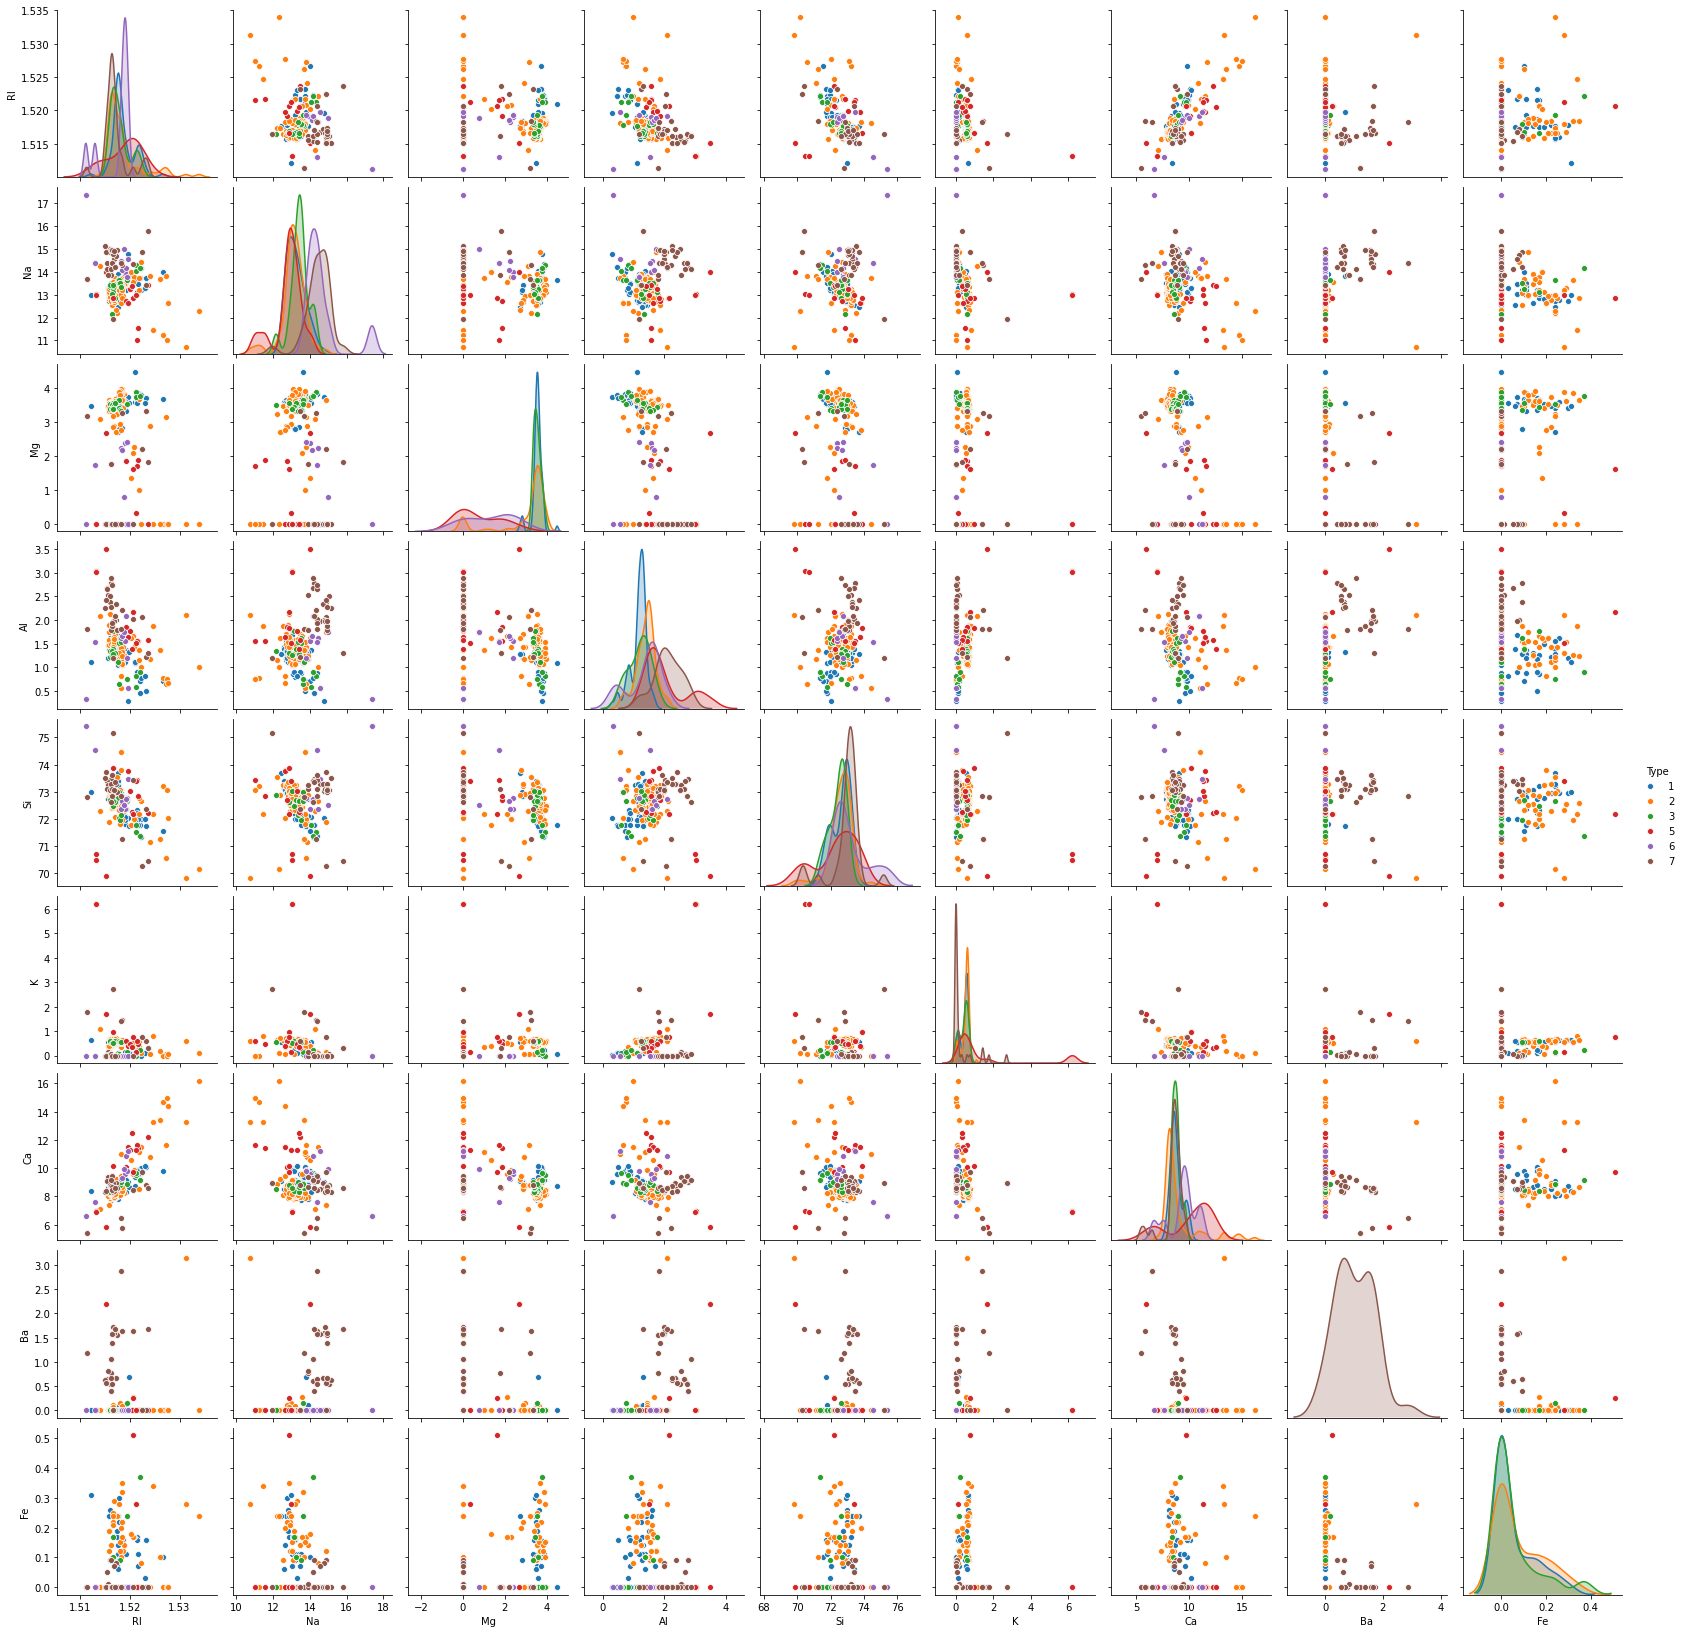

In [11]:
sns.pairplot(glass_org, kind="scatter", hue = "Type")

## 5. Dystrybucja klas w zbiorze oryginalnym

In [12]:
def class_distr(glass):
    ile_ob_klas = []
    for i in range(1,8):
        ile_ob_klas.append(glass[glass.Type == i].shape[0])
    ile_ob_klas = pd.DataFrame(ile_ob_klas, index=range(1,8), columns=['ilość obiektów'])
    print(ile_ob_klas)
    ile_ob_klas.plot(kind='bar')

Klasa 4 zostanie całkowicie pominięta w następujących rozważaniach i można ją traktować jako nieistniejącą. Z powodu braku jej próbek żaden obiekt nie będzie mógł zostać do niej przypisany. Oryginalny zbiór jest niezbalansowany.

   ilość obiektów
1              70
2              76
3              17
4               0
5              13
6               9
7              29


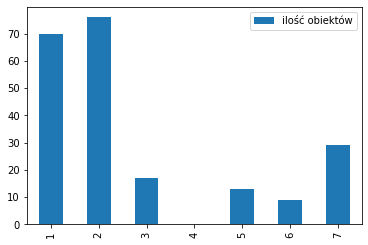

In [13]:
class_distr(glass_org)

## 6. Testowanie modeli - walidacja krzyżowa StratifiedKFold

Oryginalny zbiór jest niezbalansowany czyli klasy posiadają różną ilość obiektów. Z tego powodu dzieląc zbiór na części uczącą oraz testową należy zadbać o to aby dane były dzielone losowo o ile zawartość klas w obu zbiorach będzie odpowiednia. Dlatego właśnie użyto StratifiedKFold zamiast KFold. Ponadto część uczącą na której będzie trenowany model należy zbalansować metodą oversamplingu SMOTE tak aby wpływ każdej klasy na trenowanie modelu był równy. Ponieważ dane testowe pozostają niezbalansowane to miarą sukcesu testowania będzie precyzja i czułość. Właściwie będą to średnie tych wartości w n iteracjach testowania z różnym podziałem na część uczącą i testową. 

In [14]:
def verify(model, x_learn, y_learn, x_test, y_test):
    #dopasowuje model do podanych danych uczących, testuje i zwraca słownik z informacjami
    model.fit(x_learn, y_learn)
    
    predict_test = model.predict(x_test)
    report = pd.DataFrame(metrics.classification_report(y_test, predict_test, digits=2, output_dict=True))
    
    learn_error = 1-model.score(x_learn, y_learn)
    test_error = 1-model.score(x_test, y_test)
    test_prec = report.loc['precision','macro avg']
    test_rec = report.loc['recall','macro avg']
    test_f1 = report.loc['f1-score','macro avg']
    
    return {"learn_error":learn_error,"test_error":test_error,"test_prec":test_prec,"test_rec":test_rec,"test_f1":test_f1}

In [15]:
def cross_val(model, x, y, n_splits = 9):
    #dokonuje walidacji krzyżowej, za każdym razem oversampluje zbiór uczący i zbiera wszystkie informacje w formie DataFrame
    sm = SMOTE(random_state=1)
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)
    all_scores = pd.DataFrame()
    for train_idx, test_idx in kfold.split(x, y):
        x_learn, x_test = x.iloc[train_idx,:], x.iloc[test_idx,:]
        y_learn, y_test = y.iloc[train_idx,:], y.iloc[test_idx,:]
        x_learn_res, y_learn_res = sm.fit_resample(x_learn, y_learn)
        
        scores = pd.DataFrame(verify(model, x_learn_res, y_learn_res, x_test, y_test), index = [0])
        all_scores = all_scores.append(scores)
        
    all_scores.index = range(n_splits)
    return all_scores

In [16]:
def best_knn(max_k, x, y):
    #pomaga dobrać najlepsze k < max_k, dokonuje walidacji krzyżowej dla każdego k i zwraca listę wyników - średnich F1
    wyniki = []
    for i in range(1,max_k+1):
        model = KNeighborsClassifier(n_neighbors=i)
        test_f1 = cross_val(model, x, y).mean()['test_f1']
        wyniki.append(test_f1)
    kwart = pd.DataFrame(wyniki, index=range(1,max_k+1))
    plt.figure(dpi=100)
    plt.plot(kwart,'bo-')
    plt.title('Sprawunek algorytmu kNN')
    plt.xlabel('Liczba sasiadow - k')
    plt.ylabel('Średnie F1')

In [17]:
def best_tree(max_depth, x, y):
    wyniki = []
    for i in range(1,max_depth+1):
        model = tree.DecisionTreeClassifier(max_depth=i)
        test_f1 = cross_val(model, x, y).mean()['test_f1']
        wyniki.append(test_f1)
    kwart = pd.DataFrame(wyniki, index=range(1,max_depth+1))
    plt.figure(dpi=100)
    plt.plot(kwart,'bo-')
    plt.title('Sprawunek algorytmu DD')
    plt.xlabel('Maksymalna głębokość')
    plt.ylabel('Średnie F1')

In [18]:
x = glass_org.iloc[:,:-1]
y = pd.DataFrame(glass_org.iloc[:,-1])

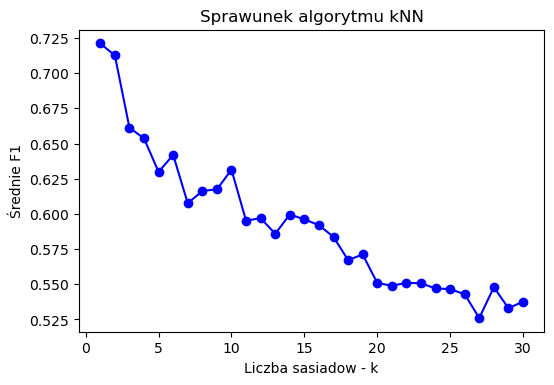

In [19]:
best_knn(30, x, y)

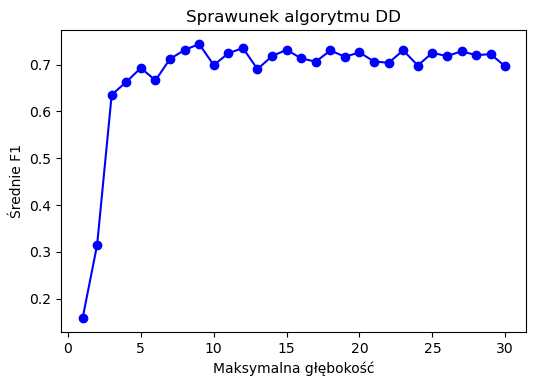

In [25]:
best_tree(30, x, y)

Najlepszym k w kNN wydaje się być k=1. Poniżej przetestowano 4 modele uczenia nadzorowanego. Dla każdego pokazano wykres kolumnowy z wynikami dla poszczólnych podziałów oraz wypisano średnie wyniki z tych podziałów. Najlepszym modelem okazał się być KNeighborsClassifier dla k=1. Ma on najwyższe średnie F1, najniższy błąd uczenia (co dawało ryzyko przetrenowania jednak wyniki sugerują dobrą zdolność generalizacji), najniższy błąd testowania (choć w tym przypadku nie jest to najistotniejsza miara), ma również najlepszą precyzję i czułość. Modele poniżej ustawiono w kolejność malejącego średniego F1. 

,uśrednione wyniki
learn_error,0.000000
test_error,0.275564
test_prec,0.731224
test_rec,0.751066
test_f1,0.721107


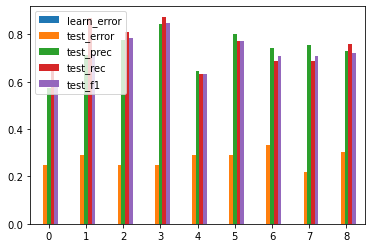

In [21]:
model = KNeighborsClassifier(n_neighbors=1)
score = cross_val(model, x, y)
score.plot.bar(rot = 0)
pd.DataFrame(score.mean(), columns = ['uśrednione wyniki'])

,uśrednione wyniki
learn_error,0.017254
test_error,0.256844
test_prec,0.738043
test_rec,0.733943
test_f1,0.720090


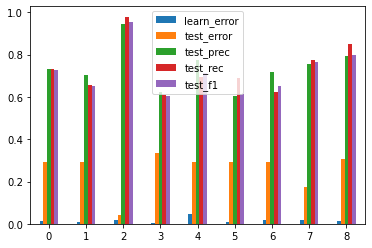

In [22]:
model = tree.DecisionTreeClassifier(max_depth=8)
score = cross_val(model, x, y)
score.plot.bar(rot = 0)
pd.DataFrame(score.mean(), columns = ['uśrednione wyniki'])

,uśrednione wyniki
learn_error,0.323448
test_error,0.625403
test_prec,0.531085
test_rec,0.578300
test_f1,0.484799


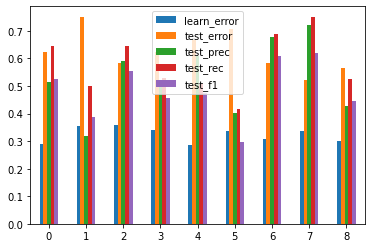

In [23]:
model = GaussianNB()
score = cross_val(model, x, y)
score.plot.bar(rot = 0)
pd.DataFrame(score.mean(), columns = ['uśrednione wyniki'])

,uśrednione wyniki
learn_error,0.342942
test_error,0.565821
test_prec,0.487787
test_rec,0.562169
test_f1,0.475761


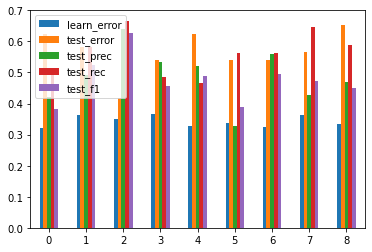

In [24]:
model = NearestCentroid()
score = cross_val(model, x, y)
score.plot.bar(rot = 0)
pd.DataFrame(score.mean(), columns = ['uśrednione wyniki'])